# Classification Metrics

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

To start, we will create a simple dataset to illustrate how classification works and we render it. 

Like in the slides, we have 2 labels for a binary classification about whether or not a patient have heart disease. There is 3 features: `age`, `weight` and `blood circulation`.



In [3]:
X = pd.DataFrame([[17, 80, 1.12, True],
                  [54, 98, 1.08, True],
                  [76, 71, 0.78, True],
                  [22, 69, 0.98, False],
                  [33, 51, 0.83, False],
                  [37, 69, 0.66, False],
                  [47, 49, 1.11, True],
                  [26, 76, 1.05, False],
                  [45, 56, 0.96, False],
                  [50, 72, 1.02, True],
                  [64, 76, 0.87, False],
                  [37, 68, 0.99, False],
                  [63, 66, 1.0, True],
                  [18, 48, 0.97, False]],
                 columns=['age','weight','blood circulation', 'label'])
X

,age,weight,blood circulation,label
0,17,80,1.12,True
1,54,98,1.08,True
2,76,71,0.78,True
3,22,69,0.98,False
4,33,51,0.83,False
5,37,69,0.66,False
6,47,49,1.11,True
7,26,76,1.05,False
8,45,56,0.96,False
9,50,72,1.02,True


We can observe the repartition of our data set

In [4]:
print(dict(zip(*np.unique(X['label'], return_counts=True))))

{False: 8, True: 6}


We will now visualize our dataset. As it has 3 dimensions, we can't plot as easily as usual. So instead we will plot it 3 times, using 2 features every time.

Text(0, 0.5, 'blood circulation')

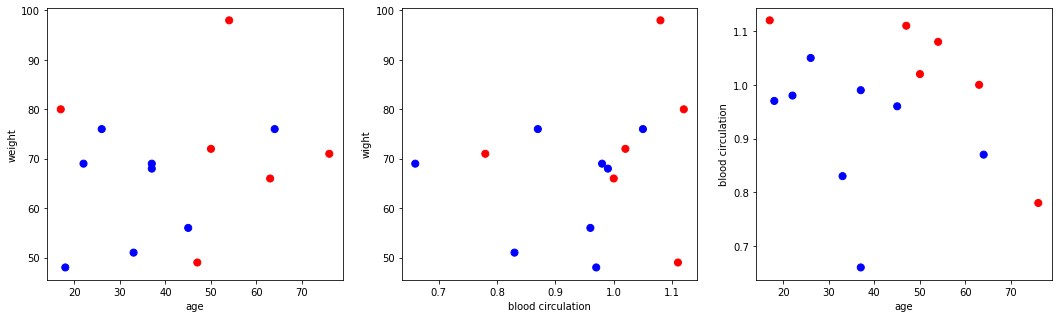

In [5]:
f, ax = plt.subplots(1,3, figsize=(18, 5))
ax[0].scatter(X['age'], X['weight'], s=50, c=X['label'], cmap = plt.cm.bwr) 
ax[0].set_xlabel('age')
ax[0].set_ylabel('weight')
ax[1].scatter(X['blood circulation'], X['weight'], s=50, c=X['label'], cmap = plt.cm.bwr) 
ax[1].set_xlabel('blood circulation')
ax[1].set_ylabel('wight')
ax[2].scatter(X['age'], X['blood circulation'], s=50, c=X['label'], cmap = plt.cm.bwr) 
ax[2].set_xlabel('age')
ax[2].set_ylabel('blood circulation')

We start by splitting our dataset in 2, a training set and a testing set. We use 70% of the data for the training set, and 30% for the testing.

In [6]:
# import the split function fron sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(X, test_size=0.30, random_state=42)

In [7]:
train_set

,age,weight,blood circulation,label
8,45,56,0.96,False
2,76,71,0.78,True
1,54,98,1.08,True
13,18,48,0.97,False
4,33,51,0.83,False
7,26,76,1.05,False
10,64,76,0.87,False
3,22,69,0.98,False
6,47,49,1.11,True


In [8]:
test_set

,age,weight,blood circulation,label
9,50,72,1.02,True
11,37,68,0.99,False
0,17,80,1.12,True
12,63,66,1.00,True
5,37,69,0.66,False


To obtain classification metrics, we need a classifier. We will use the `DecisionTreeClassifier` we used last week 

In [9]:
# importing the decision tree classifier algorithm function from sklearn
from sklearn.tree import DecisionTreeClassifier
# we create the decision tree classifier model
# random_state is used to fix the randomness and obtain the same result every time
decision_tree = DecisionTreeClassifier(random_state=42)
# we create the tree based on our dataset
# we give it all the columns except the last one as data, and the last as label
decision_tree.fit(train_set[train_set.columns[:-1]], train_set['label'])
predicted = decision_tree.predict(test_set[test_set.columns[:-1]])

Like last week, we will display the result of the classification using the tree methods

In [10]:
# display the label of the samples
print('label     :', test_set['label'].to_numpy())
# display the prediction of the patient by the classifier
print('prediction:', predicted)
# display the accuracy, between the classification of the tree and the original label
print('accuracy  :', decision_tree.score(test_set[test_set.columns[:-1]], test_set['label']))

label     : [ True False  True  True False]
prediction: [ True False False  True False]
accuracy  : 0.8


However, the score function of our model redo a classification of the test set everytime. So if we want to obtain the label (from the `predict` function) and the score (from the `score` function) we have to do 2 classifications. It can be very expensive. 

Instead, we want to create our metrics (such as the accuracy) from the prediction of the model.

In [21]:
# import the confusion matrix function
from sklearn.metrics import confusion_matrix
# we use labels=['True', 'False'] so the label are in the standard order we saw in the slides
matrix = confusion_matrix(test_set['label'], decision_tree.predict(test_set[test_set.columns[:-1]]), labels=[True, False])
# we do the transpose of the matrix so the label are on top and the prediction on the side
matrix = matrix.transpose()
matrix

array([[2, 0],
       [1, 2]])

We can use a function from sklearn to print a confusion matrix. However, it doesn't take a prediction arrays, but a model and the test set and label. It means it will recompute too the classification. Moreover, the order of the label and the arrangement Prediction/Ground truth is different tham what we wanted.

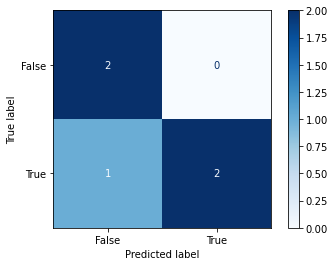

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decision_tree, test_set[test_set.columns[:-1]], test_set['label'], cmap = 'Blues')

To illustrate more easily the matrix and have a good visual representation, let's make a function

In [13]:
# Create the list of labels
labels = list(set(X['label']))
labels.sort(reverse=True)
print('pr\lb'.center(8), end='')
# print the labels on the first line
for i in labels:
    print(str(i).center(8), end='')
print('')
# print the predicted labells + the value
for i in range(len(matrix)):
    # print the row number i
    # print the label of the ith row
    print(str(labels[i]).center(8), end='')
    # print the value on the ith row
    for j in matrix[i]:
        print(str(j).center(8), end='')
    print('')

 pr\lb    True   False  
  True     2       1    
 False     0       2    


You can see that it is quite tedious to a have a nice visualisation. We could use pandas to make it simpler.

In [14]:
pd.DataFrame(matrix, columns=labels, index=labels)

,True,False
True,2,1
False,0,2


In [15]:
from utility.utility import compare_class
compare_class(predicted, test_set['label'], verbose=0, color=True)

----------------------------
| pr\lb  |  True  | False  |
----------------------------
|  True  |   2    |   0    |
----------------------------
| False  |   1    |   2    |
----------------------------


We are interested in some metrics as we saw in the slides. Mainly the precision (ppv), the recall (tpr), the f1 score and the accuracy.

Fortunately, as those are the most used metrics in classification, sklearn provides us function to compute them automatically. However, it doesn't provide information regarding the specificity, so we have to make one ourselves.

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
def tnr(matrix):
    return matrix[1][1] / matrix[:, 1].sum()

f1 = f1_score(test_set['label'], predicted)
acc = accuracy_score(test_set['label'], predicted)
recall = recall_score(test_set['label'], predicted)
precision = precision_score(test_set['label'], predicted)
specificity = tnr(matrix)
print('f1:', f1)
print('acc:', acc)
print('recall:', recall)
print('precision:', precision)
print('specificity:', specificity)

f1: 0.8
acc: 0.8
recall: 0.6666666666666666
precision: 1.0
specificity: 1.0


Let's visualise it along the matrix, as you can see them sometimes. The ppv/precision is located on the row of the positive prediction, the tpr/sensitivity/recall on the column of the positive label and the specicity/tnr on the column of the negative label.

In [25]:
compare_class(predicted, test_set['label'], verbose=2)

-------------------------------------------------------
| pr\lb  |  True  | False  | total  |  ppv   |  acc   |
-------------------------------------------------------
|  True  |   2    |   0    |   2    |  1.0   |  0.8   |
-------------------------------------------------------
| False  |   1    |   2    |   3    |  f_1   |
----------------------------------------------
| total  |   3    |   2    |   5    |  0.8   |
----------------------------------------------
|  tpr   | 0.667  |  tnr   |  1.0   |
-------------------------------------


We can also observe how important and diverse the different metrics can be regarding the results of the classification. With a small dataset li

In [17]:
d1 = DecisionTreeClassifier(random_state=42)
d2 = DecisionTreeClassifier(random_state=42)
d3 = DecisionTreeClassifier(random_state=42)

train_set1, test_set1 = train_test_split(X, test_size=0.30, random_state=1)
train_set2, test_set2 = train_test_split(X, test_size=0.30, random_state=2)
train_set3, test_set3 = train_test_split(X, test_size=0.30, random_state=4)

d1.fit(train_set[train_set1.columns[:-1]], train_set1['label'])
p1 = d1.predict(test_set1[test_set1.columns[:-1]])

d2.fit(train_set[train_set2.columns[:-1]], train_set2['label'])
p2 = d2.predict(test_set2[test_set2.columns[:-1]])

d3.fit(train_set[train_set3.columns[:-1]], train_set3['label'])
p3 = d3.predict(test_set3[test_set3.columns[:-1]])

In [18]:
print('label     :', test_set1['label'].to_numpy())
print('prediction:', p1)
compare_class(p1, test_set1['label'], verbose=2)

label     : [False False  True  True False]
prediction: [False  True False  True False]
-------------------------------------------------------
| pr\lb  |  True  | False  | total  |  ppv   |  acc   |
-------------------------------------------------------
|  True  |   1    |   1    |   2    |  0.5   |  0.6   |
-------------------------------------------------------
| False  |   1    |   2    |   3    |  f_1   |
----------------------------------------------
| total  |   2    |   3    |   5    |  0.5   |
----------------------------------------------
|  tpr   |  0.5   |  tnr   | 0.667  |
-------------------------------------


In [17]:
print('label     :', test_set2['label'].to_numpy())
print('prediction:', p2)
compare_class(p2, test_set1['label'], verbose=2)

label     : [False False False  True  True]
prediction: [False  True  True  True False]
-------------------------------------------------------
| pr\lb  |  True  | False  | total  |  ppv   |  acc   |
-------------------------------------------------------
|  True  |   2    |   1    |   3    | 0.667  |  0.8   |
-------------------------------------------------------
| False  |   0    |   2    |   2    |  f_1   |
----------------------------------------------
| total  |   2    |   3    |   5    |  0.8   |
----------------------------------------------
|  tpr   |  1.0   |
-------------------


In [18]:
print('label     :', test_set3['label'].to_numpy())
print('prediction:', p3)
compare_class(p3, test_set1['label'], verbose=2)

label     : [False False False  True  True]
prediction: [False False False  True False]
-------------------------------------------------------
| pr\lb  |  True  | False  | total  |  ppv   |  acc   |
-------------------------------------------------------
|  True  |   1    |   0    |   1    |  1.0   |  0.8   |
-------------------------------------------------------
| False  |   1    |   3    |   4    |  f_1   |
----------------------------------------------
| total  |   2    |   3    |   5    | 0.667  |
----------------------------------------------
|  tpr   |  0.5   |
-------------------
